In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
### Google geographic center of the USA. Open wikipedia page and you will find latitudes and longitudes.

In [4]:
### Now convert the degrees into decimal degrees by some online converter

In [5]:
### Convention - North & East are positive, while West & South are positive

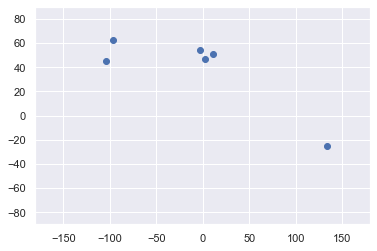

In [6]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [7]:
### The above clusters shows America, Europe, Australia

In [8]:
### DataFrame.iloc(row indices, column indices): slices the data frame, given rows & columns to be kept

In [9]:
x = data.iloc[:,1:3]

In [10]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### Clustering

In [11]:
kmeans = KMeans(3)

In [12]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [13]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [14]:
data_clusters = data.copy()
data_clusters['Clusters'] = identified_clusters
data_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


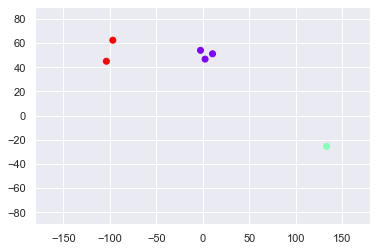

In [15]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
#cmap: for color, as the default color for matplotlib is not so pretty

In [16]:
### There are 3 colors defining 3 different clusters.

### That was so simple. Now let's try with all the countries and try to divide them into 7 clusters for 7 continents

In [17]:
data1 = pd.read_csv("countries2.csv")
data1

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


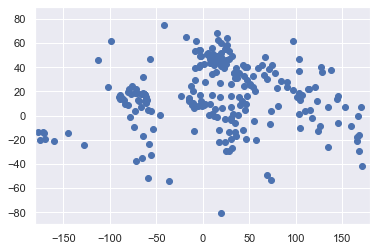

In [18]:
plt.scatter(data1['Longitude'], data1['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [19]:
x1 = data1.iloc[:,1:3]
x1

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [20]:
kmeans1 = KMeans(7)
kmeans1.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
identified_clusters1 = kmeans1.fit_predict(x1)
identified_clusters1

array([3, 5, 4, 3, 0, 0, 0, 5, 3, 5, 2, 4, 1, 4, 3, 1, 0, 5, 4, 0, 6, 6,
       5, 0, 5, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 5, 4, 6, 0, 3, 1, 6, 6,
       4, 6, 2, 3, 4, 6, 3, 3, 3, 3, 5, 5, 0, 0, 5, 3, 0, 3, 6, 3, 5, 5,
       0, 0, 4, 0, 1, 3, 0, 0, 1, 6, 0, 5, 0, 6, 6, 6, 6, 6, 0, 3, 0, 3,
       1, 3, 1, 4, 3, 0, 3, 0, 1, 0, 5, 1, 4, 0, 5, 5, 0, 5, 0, 3, 0, 5,
       1, 5, 5, 4, 5, 1, 3, 3, 1, 0, 5, 1, 5, 6, 0, 3, 0, 5, 4, 0, 0, 0,
       1, 3, 6, 0, 0, 4, 5, 3, 1, 0, 6, 0, 1, 0, 1, 1, 4, 6, 3, 4, 4, 1,
       4, 1, 6, 1, 6, 3, 2, 0, 0, 5, 1, 1, 5, 5, 3, 2, 3, 1, 1, 1, 0, 3,
       1, 0, 3, 5, 2, 5, 0, 5, 4, 6, 5, 5, 4, 6, 1, 3, 6, 1, 6, 3, 0, 5,
       4, 3, 0, 6, 3, 0, 0, 0, 4, 3, 4, 5, 3, 6, 6, 1, 5, 5, 1, 2, 3, 0,
       5, 1, 4, 4, 0, 3, 3, 5, 0, 3, 3, 3, 3, 1, 1, 2, 2, 5, 4, 4, 4])

In [22]:
data_clusters1 = data1.copy()

In [23]:
data_clusters1['Clusters'] = identified_clusters1

In [24]:
data_clusters1

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,5
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2
237,Yemen,47.586762,15.909280,5
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


##### Can't wait to get results!!!

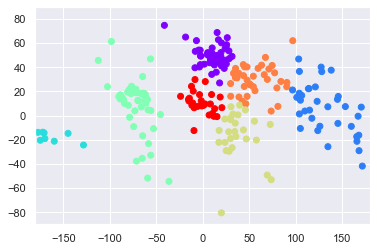

In [25]:
plt.scatter(data1['Longitude'], data1['Latitude'], c=data_clusters1['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [26]:
### Americas, Europe, Africas, (West & East Asia), Pacific.